In [22]:
from scipy.stats import mannwhitneyu, ttest_ind
import numpy as np
import pandas as pd
import pingouin as pg
from sklearn.preprocessing import OrdinalEncoder
from scipy.stats import boxcox

## Homecage vs Task

In [47]:
score_means_file = "/hpc/home/mk423/Anxiety/FullDataWork/Projections/bxcx_c19_epm_mean_scores.csv"
df = pd.read_csv(score_means_file)
#df = df.sort_values("condition").copy()

mouse_encoder = OrdinalEncoder().fit(df["mouse"].values.reshape(-1,1))
geno_encoder = OrdinalEncoder().fit(df["condition"].values.reshape(-1,1))

anova_dict = {
    #"n1_score":boxcox(20*np.hstack([df["net 1 avgHCScore"],
    #                      df["net 1 avgTaskScore"]]))[0],
    
    #"n2_score":boxcox(20*np.hstack([df["net 2 avgHCScore"],
    #                      df["net 2 avgTaskScore"]]))[0],
    
    "n1_score":np.hstack([df["net 1 avgHCScore"],
                          df["net 1 avgTaskScore"]]),
    
    "n2_score":np.hstack([df["net 2 avgHCScore"],
                          df["net 2 avgTaskScore"]]),
    
    "mouse":np.hstack([mouse_encoder.transform(df["mouse"].values.reshape(-1,1)).squeeze(),
                       mouse_encoder.transform(df["mouse"].values.reshape(-1,1)).squeeze()]).astype(int)+1,
    
    "geno":np.hstack([geno_encoder.transform(df["condition"].values.reshape(-1,1)).squeeze(),
                      geno_encoder.transform(df["condition"].values.reshape(-1,1)).squeeze()]).astype(int),
    
    "inTask":np.hstack([np.zeros(df.shape[0]),
                         np.ones(df.shape[0])]).astype(int),
}

df_anova = pd.DataFrame.from_dict(anova_dict)
df_anova.to_csv("/hpc/home/mk423/bxcx_hc_vs_task_means.csv",index=False)

(array([2., 1., 4., 5., 5., 2., 6., 5., 2., 2.]),
 array([-0.13531575,  0.01484703,  0.16500982,  0.3151726 ,  0.46533539,
         0.61549817,  0.76566096,  0.91582374,  1.06598653,  1.21614932,
         1.3663121 ]),
 <BarContainer object of 10 artists>)

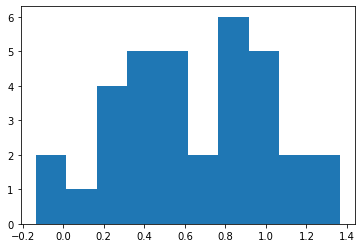

In [45]:
import matplotlib.pyplot as plt
plt.hist(df_anova.n1_score)

(array([ 1.,  5.,  4.,  2.,  3., 10.,  5.,  2.,  0.,  2.]),
 array([0.29190731, 0.63590848, 0.97990964, 1.32391081, 1.66791198,
        2.01191315, 2.35591431, 2.69991548, 3.04391665, 3.38791782,
        3.73191898]),
 <BarContainer object of 10 artists>)

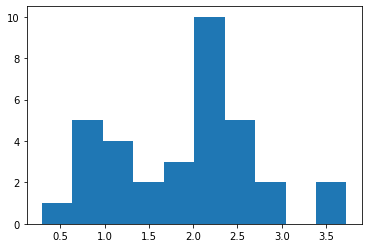

In [36]:
import matplotlib.pyplot as plt
plt.hist(df_anova.n2_score)

In [48]:
pg.mixed_anova(dv="n1_score",between="geno",within="inTask",subject="mouse",data=df_anova)

,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,geno,0.234851,1,15,0.234851,1.167202,0.297042,0.072196,NaN
1,inTask,0.593205,1,15,0.593205,13.112025,0.002515,0.466421,1.0
2,Interaction,0.031340,1,15,0.031340,0.692730,0.418292,0.044143,NaN


In [49]:
pg.mixed_anova(dv="n2_score",between="geno",within="inTask",subject="mouse",data=df_anova)

,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,geno,0.535465,1,15,0.535465,1.474108,0.243469,0.089480,NaN
1,inTask,0.963998,1,15,0.963998,12.251514,0.003222,0.449572,1.0
2,Interaction,0.039072,1,15,0.039072,0.496570,0.491808,0.032044,NaN


In [42]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.regression.mixed_linear_model import MixedLM

re_formula = "0 + mouse"
md = MixedLM.from_formula("n1_score ~ geno + inTask + geno*inTask",data=df_anova,groups=df_anova["mouse"],re_formula=re_formula)
result = md.fit()
print(result.summary())
print("geno:task",result.f_test("geno:inTask"))
print("geno",result.f_test("geno"))
print("task",result.f_test("inTask"))

        Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: n1_score
No. Observations: 34      Method:             REML    
No. Groups:       17      Scale:              0.0686  
Min. group size:  2       Log-Likelihood:     -16.4693
Max. group size:  2       Converged:          Yes     
Mean group size:  2.0                                 
------------------------------------------------------
              Coef. Std.Err.   z   P>|z| [0.025 0.975]
------------------------------------------------------
Intercept     0.273    0.164 1.663 0.096 -0.049  0.594
geno          0.381    0.231 1.648 0.099 -0.072  0.834
inTask        0.228    0.123 1.848 0.065 -0.014  0.470
geno:inTask   0.133    0.180 0.736 0.461 -0.220  0.485
mouse Var     0.001    0.006                          

geno:task <F test: F=0.542358770452243, p=0.46717701046940363, df_denom=30, df_num=1>
geno <F test: F=2.717324970573895, p=0.10969931883979914, df_denom=30, df_num=1>
task <F test: F=

/hpc/home/mk423/.local/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


In [43]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.regression.mixed_linear_model import MixedLM

re_formula = "0 + mouse"
md = MixedLM.from_formula("n2_score ~ geno + inTask + geno*inTask",data=df_anova,groups=df_anova["mouse"],re_formula=re_formula)
result = md.fit()
print(result.summary())
print("geno:task",result.f_test("geno:inTask"))
print("geno",result.f_test("geno"))
print("task",result.f_test("inTask"))

        Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: n2_score
No. Observations: 34      Method:             REML    
No. Groups:       17      Scale:              0.2742  
Min. group size:  2       Log-Likelihood:     -36.6579
Max. group size:  2       Converged:          Yes     
Mean group size:  2.0                                 
------------------------------------------------------
              Coef. Std.Err.   z   P>|z| [0.025 0.975]
------------------------------------------------------
Intercept     1.616    0.240 6.739 0.000  1.146  2.085
geno          0.494    0.357 1.381 0.167 -0.207  1.194
inTask        0.431    0.247 1.746 0.081 -0.053  0.915
geno:inTask   0.270    0.360 0.752 0.452 -0.435  0.976
mouse Var     0.004    0.008                          

geno:task <F test: F=0.565121639670819, p=0.45806149525748585, df_denom=30, df_num=1>
geno <F test: F=1.9063565818341086, p=0.17756926571946413, df_denom=30, df_num=1>
task <F test: F

/hpc/home/mk423/.local/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


### Behavior

In [4]:
CLOCK_OA_TIME_PERC = [2.24,10.47,19.68,6.18,6.94,4.74,3.78,14.30,6.16,1.93,1.00,0.68,1.23,2.10,2.78,4.01,9.95]
WT_OA_TIME_PERC = [0.56,0.39,4.20,1.61,0.39,5.94,1.68,1.29,0.66,5.46,3.99,0.60,0.78,0.97,0.28,2.06,1.22]

CLOCK_OA_TIME = [13.45,62.80,118.08,37.10,41.63,28.45,22.68,85.78,36.98,11.57,5.98,4.08,7.38,12.58,16.70,24.05,59.70]
WT_OA_TIME = [3.38,2.33,25.18,9.65,2.33,35.63,10.08,7.73,3.98,32.75,23.93,3.58,4.70,5.80,1.68,12.38,7.33]


print("WT Var: {:.2f} CLOCK Var: {:.2f}".format(np.std(WT_OA_TIME)**2,np.std(CLOCK_OA_TIME)**2))
result = ttest_ind(WT_OA_TIME,CLOCK_OA_TIME,equal_var=False,alternative="less")
print(result)

WT Var: 114.19 CLOCK Var: 920.03
Ttest_indResult(statistic=-2.901357840619022, pvalue=0.004427193719733533)


### Homecage

In [45]:
hc_clck_mouse_id = ["Mouse0912",
"Mouse0913",
"Mouse69872",
"Mouse69873",
"Mouse2401",
"Mouse3881",
"Mouse3882",
"Mouse3883",
"Mouse69841",
                ]
clck_net_1_hc_scores = [0.06092664,0.04750466,0.074340366,0.07358543,0.0842634,0.05705384,0.09860658,0.09719049,0.07288882]

hc_wt_mouse_id = ["Mouse0911",
"Mouse0914",
"Mouse69861",
"Mouse69862",
"Mouse2402",
"Mouse2403",
"Mouse30391",
"Mouse30392",
                 ]
wt_net_1_hc_scores = [0.090969,0.0930634,0.07141278,0.07168583,0.06135689,0.08069093,0.087130055,0.07916829]

result = mannwhitneyu(wt_net_1_hc_scores,clck_net_1_hc_scores,alternative="greater")
print(result)

MannwhitneyuResult(statistic=42.0, pvalue=0.30292060880296173)


In [46]:
clck_net_2_hc_scores = [0.10615021,0.13203858,0.13508245,0.06408509,0.15980944,0.08499632,0.13755529,0.13206524,0.08291493]
wt_net_2_hc_scores = [0.1441459,0.15201557,0.08090967,0.10579219,0.14723016,0.1413077,0.14531954,0.09232564]

result = mannwhitneyu(wt_net_2_hc_scores,clck_net_2_hc_scores,alternative="greater")
print(result)

MannwhitneyuResult(statistic=47.0, pvalue=0.16063348416289594)


### Transitions

In [47]:
tran_clock_mouse_id = ["Mouse0912",
"Mouse0913",
"Mouse69872",
"Mouse69873",
"Mouse2401",
"Mouse3881",
"Mouse3882",
"Mouse3883",
"Mouse69841",
                      ]

n1_clock_transition = [0.045136111,
0.069879461,
0.101347684,
0.099294627,
0.089232487,
0.090017068,
0.110296893,
0.100642435,
0.093758095,
                      ]

tran_wt_mouse_id = [
"Mouse2402",
"Mouse2403",
"Mouse30391",
"Mouse30392",
"Mouse0914",
"Mouse69861",
"Mouse69862",

]
n1_wt_transitions = [0.07703671,
0.102370776,
0.105240737,
0.122051986,
0.124922679,
0.122349318,
0.124128159,
                    ]



In [48]:
results = mannwhitneyu(n1_clock_transition,n1_wt_transitions,alternative="less")
print(results)

MannwhitneyuResult(statistic=9.0, pvalue=0.008216783216783218)


In [49]:
n2_clock_transitions = [0.119389881,
0.170481203,
0.156258801,
0.132562868,
0.17544026,
0.124476281,
0.159161024,
0.13951989,
0.123745577]

n2_wt_transitions = [0.178078196,
0.153959205,
0.175951997,
0.162913553,
0.2112835,
0.159183934,
0.165844992]

In [50]:
results = mannwhitneyu(n2_clock_transitions,n2_wt_transitions,alternative="less")
print(results)

MannwhitneyuResult(statistic=10.0, pvalue=0.011451048951048953)


## Mixed Effects Anova

In [62]:
all_mice_list = list(set(hc_clck_mouse_id+hc_wt_mouse_id+tran_clock_mouse_id+tran_wt_mouse_id))

In [71]:
n1_df = pd.DataFrame({"scores":np.hstack([clck_net_1_hc_scores,
                                          wt_net_1_hc_scores,
                                          n1_clock_transition,
                                          n1_wt_transitions]).astype(float),
                      
                      "genotype":np.hstack([[0 for _ in clck_net_1_hc_scores],
                                            [1 for _ in wt_net_1_hc_scores],
                                            [0 for _ in n1_clock_transition],
                                            [1 for _ in n1_wt_transitions]]).astype(int),
                      
                      "location":np.hstack([[0 for _ in clck_net_1_hc_scores],
                                            [0 for _ in wt_net_1_hc_scores],
                                            [1 for _ in n1_clock_transition],
                                            [1 for _ in n1_wt_transitions]]).astype(int),
                      
                      "mouse":np.hstack([[all_mice_list.index(mouse) for mouse in hc_clck_mouse_id],
                                          [all_mice_list.index(mouse) for mouse in hc_wt_mouse_id],
                                          [all_mice_list.index(mouse) for mouse in tran_clock_mouse_id],
                                          [all_mice_list.index(mouse) for mouse in tran_wt_mouse_id]]).astype(int)+1
                        })

pg.mixed_anova(dv="scores",between="genotype",within="location",subject="mouse",data=n1_df)

,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,genotype,0.001337,1,14,0.001337,2.891762,0.111130,0.171194,NaN
1,location,0.004205,1,14,0.004205,35.566997,0.000035,0.717554,1.0
2,Interaction,0.000679,1,14,0.000679,5.739160,0.031127,0.290750,NaN


In [70]:
n2_df = pd.DataFrame({"scores":np.hstack([clck_net_2_hc_scores,
                                          wt_net_2_hc_scores,
                                          n2_clock_transitions,
                                          n2_wt_transitions]).astype(float),
                      
                      "genotype":np.hstack([[0 for _ in clck_net_2_hc_scores],
                                            [1 for _ in wt_net_2_hc_scores],
                                            [0 for _ in n2_clock_transitions],
                                            [1 for _ in n2_wt_transitions]]).astype(int),
                      
                      "location":np.hstack([[0 for _ in clck_net_2_hc_scores],
                                            [0 for _ in wt_net_2_hc_scores],
                                            [1 for _ in n2_clock_transitions],
                                            [1 for _ in n2_wt_transitions]]).astype(int),
                      
                      "mouse":np.hstack([[all_mice_list.index(mouse) for mouse in hc_clck_mouse_id],
                                          [all_mice_list.index(mouse) for mouse in hc_wt_mouse_id],
                                          [all_mice_list.index(mouse) for mouse in tran_clock_mouse_id],
                                          [all_mice_list.index(mouse) for mouse in tran_wt_mouse_id]]).astype(int)+1
                        })

pg.mixed_anova(dv="scores",between="genotype",within="location",subject="mouse",data=n2_df)

,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,genotype,0.002622,1,14,0.002622,2.298143,0.151779,0.141006,NaN
1,location,0.011577,1,14,0.011577,50.333140,0.000005,0.782383,1.0
2,Interaction,0.000734,1,14,0.000734,3.191347,0.095695,0.185637,NaN
